#**The Ultimate Guide to Data Splitting for Machine Learning**

In the world of machine learning, the choice of data-splitting technique is crucial yet often underestimated. Selecting the correct method to partition your data isn’t just a procedural step; it’s a critical factor that can significantly impact model reliability, performance metrics, and generalizability to real-world data. A robust data split effectively prepares your model for the unseen, ensuring it can handle the noise and variability it will encounter outside of a controlled environment.

Data splitting isn’t a one-size-fits-all situation. Different datasets come with unique challenges: imbalanced classes, time dependencies, grouped observations, and more. Depending on the problem, certain splitting methods can better preserve patterns, handle sequential data, or maintain class distributions. In this article, we’ll dive into the most essential data-splitting techniques, examining how each one addresses specific data characteristics and influences model performance.

Here’s what we’ll cover:
1.    Holdout (train-test split) Technique
2.    Stratified Splitting
3.    ShuffleSplit
4.    StratifiedShuffleSplit
5.    K-Fold Cross-Validation
6.    StratifiedKFold
7.    TimeSeriesSplit
8.    LeaveOneOut
9.    LeavePOut


## **What You’ll Learn in This Notebook**
For each technique, we’ll go beyond the basics. You’ll see:

* **When to Use Each Technique:** Understand the specific data scenarios where each method shines and why selecting the right method is pivotal to model success.
* **Visualizations and Code Walkthroughs:** Each technique will be paired with easy-to-understand code examples and visualized split indices, so you can see the exact mechanics of each split.
* **Model Performance Evaluation:** Understand how different data splits impact model accuracy, generalization, and efficiency. We will evaluate the model's performance under each splitting method using accuracy scores and also discuss how the choice of split influences training time, providing insights on the trade-off between model performance and computational cost.
* **Time Comparison:** Learn how each data-splitting method varies in execution time, helping you make informed decisions when working with large datasets or resource-constrained environments.

By the end of this notebook, you’ll have a clear, nuanced understanding of data-splitting techniques and the ability to confidently select the right method to enhance your machine learning models’ reliability, generalizability, and performance. Let’s get started on setting a strong foundation for your model, one split at a time.

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from matplotlib.patches import Patch

plt.style.use('fivethirtyeight')
cmap_cv = plt.cm.coolwarm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def visualize_cv_method(cv_method, n_splits=5):
    plt.figure(figsize=(11, 6))

    for j, (train_index, test_index) in enumerate(cv_method.split(X, y)):
        plt.scatter(train_index, [j] * len(train_index), color=cmap_cv(0.02), marker='_', lw=20)
        plt.scatter(test_index, [j] * len(test_index), color=cmap_cv(0.8), marker='_', lw=20)

    plt.yticks(range(n_splits))
    plt.gca().invert_yaxis()
    plt.title(cv_method.__class__.__name__, fontsize=15)
    plt.xlabel('Sample Index')
    plt.ylabel('CV Iteration')
    plt.legend([Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
               ['Testing set', 'Training set'], loc=(1.02, 0.8))
    plt.tight_layout()
    plt.show()

# **Section 1: Understanding Cross-Validation**


Cross-validation is a technique used in machine learning to evaluate the performance and robustness of a model. Unlike a single train-test split, cross-validation divides the dataset into multiple subsets (or folds) and trains the model on different combinations of these folds. This approach provides a more reliable estimate of a model’s ability to generalize to unseen data by ensuring it is tested on multiple, diverse subsets.

The primary benefit of cross-validation is that it helps mitigate overfitting by exposing the model to various data splits. This allows for a more accurate assessment of how well the model will perform in real-world scenarios, where it will encounter new data. Additionally, it provides a better understanding of model stability and reliability, particularly in small datasets where each data point is crucial. However, cross-validation can be computationally expensive, especially with large datasets or complex models, so it’s important to choose the right technique based on the project’s requirements.

# **Section 2: Types of Cross-Validation Techniques**

## **2.1. Holdout (train-test split) Technique**

The holdout method, often implemented via train_test_split in libraries like scikit-learn, is one of the most straightforward and foundational data splitting techniques in machine learning. In this approach, the data is divided into two primary subsets: a training set and a test set, often using an 80-20 or 70-30 split. The training data is used to build and tune the model, while the test set remains untouched to provide an unbiased estimate of model performance.

* **Advantages**
  - **Simplicity and Speed:** The holdout method is easy to understand and implement, making it particularly valuable for rapid experimentation. Since the split is performed only once, it’s computationally inexpensive, allowing for quick prototyping and iterative model development.
  - **Initial Performance Insight:** Testing on data that hasn’t been seen by the model provides an initial sense of how well the model might generalize. While limited, this can be a good early indicator of performance trends, helping to identify basic strengths and weaknesses.

* **Disadvantages**
  - **High Sensitivity to Data Split:** The single split can result in high variance in performance metrics. Depending on how the data happens to be divided, the model’s metrics can vary significantly, especially if certain patterns, classes, or outliers are unevenly distributed between training and test sets.
  - **Less Effective for Small Datasets:** In small datasets, the holdout method reduces the volume of data available for both training and testing, which often produces unreliable results. A smaller training set can lead to underfitting or poor model generalization, while a smaller test set can produce highly variable metrics that don’t accurately reflect real-world performance.

* **Best Use Cases**

  - **Large, Representative Datasets:** The dataset is large enough to ensure that each subset still represents the full data distribution, reducing the impact of sampling bias.
  - **Quick Insights Required:** When computational efficiency is critical—such as in the early stages of model development—the holdout method can provide a rough performance benchmark, which can later be fine-tuned with more robust techniques.
  
Overall, the holdout technique is a practical and efficient starting point for evaluating model performance. However, it may lack the robustness needed for smaller datasets or when more reliable metrics are critical, in which case cross-validation techniques offer a deeper and more nuanced view of model generalization across varied data samples.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples = 20
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

train_indices = np.where(np.isin(X, X_train))[0]
test_indices = np.where(np.isin(X, X_test))[0]

print('Holdout Split:')
print(f'Training indices: {", ".join(map(str, train_indices))}')
print(f'Testing indices: {", ".join(map(str, test_indices))}\n')

Holdout Split:
Training indices: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19
Testing indices: 0, 1, 15, 17



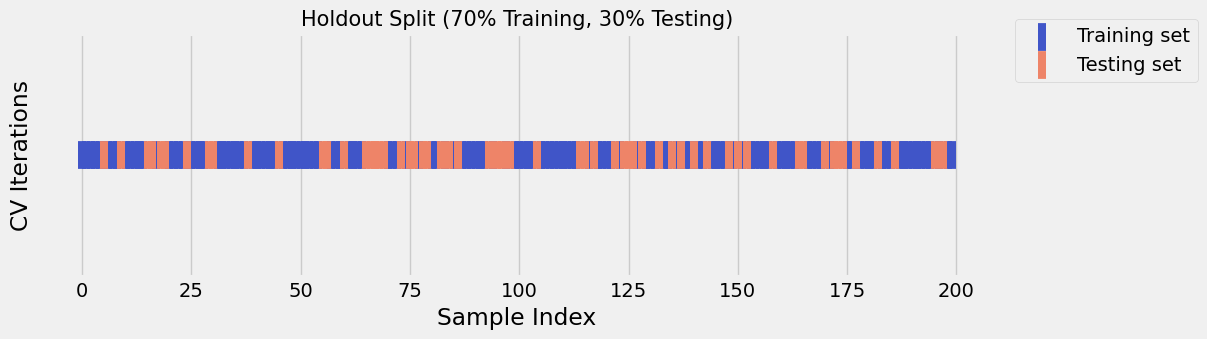

In [ ]:
# Plot the Holdout split
plt.figure(figsize=(11, 3))
plt.scatter(train_indices, [0] * len(train_indices), color=cmap_cv(0.02), marker='_', lw=20, label='Training set')
plt.scatter(test_indices, [0] * len(test_indices), color=cmap_cv(0.8), marker='_', lw=20, label='Testing set')

# Formatting the plot
plt.title('Holdout Split (70% Training, 30% Testing)', fontsize=15)
plt.xlabel('Sample Index')
plt.ylabel('CV Iterations')
plt.yticks([])
plt.legend(loc=(1.02, .8))
plt.show()

When using shuffle=True (default), the data is randomly shuffled before splitting, resulting in a more randomized distribution of training and testing indices. This is ideal for ensuring the model is not biased by the order of the data.

On the other hand, with shuffle=False, the data is split in its original order, with the training set consisting of the first 70% of samples and the testing set the remaining 30%. This is typically used for time series or scenarios where data order matters.

## **2. 2.    Stratified Splitting**

Stratified splitting is a data partitioning technique that ensures each subset maintains the same distribution of target classes as the original dataset. This approach is particularly useful in classification tasks where class imbalance can affect model training and evaluation. By preserving class proportions in both training and test sets, stratified splitting allows for a more representative and balanced model evaluation.

Here's how a typical stratified split is implemented in Python:

```python
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
```

In this code, stratify=y ensures that the split maintains the same class distribution in y_train and y_temp as in y, which is particularly helpful for imbalanced classification problems.

* **Advantages**
  - **Improved Representation of Classes:** Stratified splitting ensures each subset contains the same proportion of each class as the full dataset. This consistency is especially beneficial in imbalanced datasets, where a random split could yield subsets that lack sufficient representation for certain classes, skewing model performance.
  - **Reduced Variance in Model Performance:** By maintaining class distributions across splits, stratified splitting helps mitigate performance fluctuations caused by data imbalances. This results in a more reliable and stable evaluation of model generalization.

* **Disadvantages**
  - **Limited Applicability to Regression:** Stratified splitting is mainly effective for classification tasks where discrete classes are present. In regression problems with continuous target values, it’s generally less applicable, as there's no categorical target to stratify on.
  - **Potential Computational Overhead:** For large datasets or complex class structures, stratified splitting can add slight computational complexity compared to a standard holdout. While often minor, this can become noticeable with very large datasets or many stratification levels.

* **Best Use Cases**
  - **Class Imbalance Exists:** In datasets with imbalanced classes, stratified splitting helps to preserve class distributions, enabling the model to learn each class proportionately and to be evaluated more accurately.
  - **Reliable Performance Estimation is Needed:** For model evaluation, stratified splitting gives a more accurate view of how the model might perform in real-world scenarios where class distributions mirror those in the original dataset.

In summary, stratified splitting is a highly recommended approach for classification tasks, especially those involving imbalanced data. By maintaining class proportions across splits, it enhances model training and evaluation consistency, resulting in a more realistic assessment of model performance across different classes. For regression tasks, however, other data splitting techniques may be more appropriate.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples = 200
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], n_samples, p=[0.9, 0.1])

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

def print_class_distribution(y_data, label="Data"):
    unique, counts = np.unique(y_data, return_counts=True)
    percentages = (counts / len(y_data)) * 100
    print(f"{label} Class Distribution:")
    for cls, count, percent in zip(unique, counts, percentages):
        print(f"Class {cls}: {count} ({percent:.2f}%)")
    print("")


print_class_distribution(y, "Original")
print_class_distribution(y_train, "Training Set")
print_class_distribution(y_test, "Test Set")

Original Class Distribution:
Class 0: 184 (92.00%)
Class 1: 16 (8.00%)

Training Set Class Distribution:
Class 0: 147 (91.88%)
Class 1: 13 (8.12%)

Test Set Class Distribution:
Class 0: 37 (92.50%)
Class 1: 3 (7.50%)



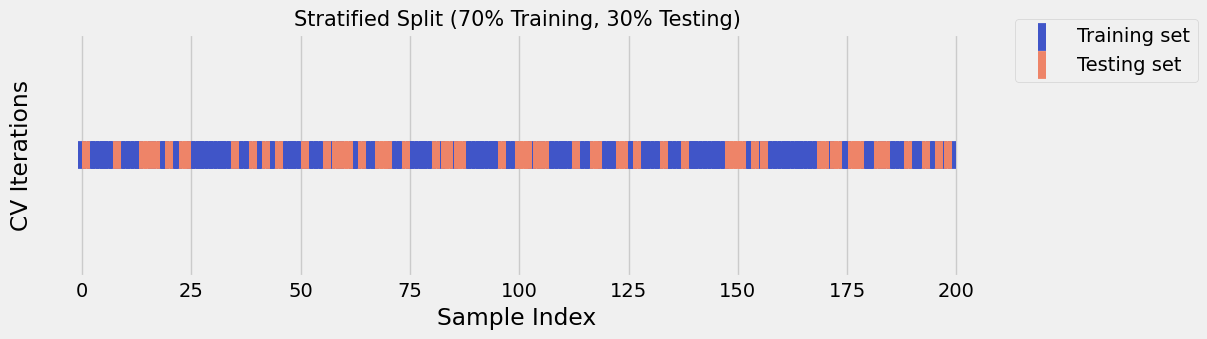

In [ ]:
# Get the indices of the training and testing sets
train_indices = np.where(np.isin(X, X_train))[0]
test_indices = np.where(np.isin(X, X_test))[0]

# Plot the Stratified split
plt.figure(figsize=(11, 3))
plt.scatter(train_indices, [0] * len(train_indices), color=cmap_cv(0.02), marker='_', lw=20, label='Training set')
plt.scatter(test_indices, [0] * len(test_indices), color=cmap_cv(0.8), marker='_', lw=20, label='Testing set')

# Formatting the plot
plt.title('Stratified Split (70% Training, 30% Testing)', fontsize=15)
plt.xlabel('Sample Index')
plt.ylabel('CV Iterations')
plt.yticks([])
plt.legend(loc=(1.02, .8))
plt.show()

## **2.3.    ShuffleSplit**


ShuffleSplit is a flexible data splitting technique that randomly partitions the dataset multiple times into train and test sets. Unlike K-fold cross-validation, which divides the data into fixed, non-overlapping folds, ShuffleSplit creates multiple random train-test splits without regard for preserving fold structure, enabling it to generate as many random samples as specified by the user. This method is especially useful when you want a reliable estimate of model performance while having the flexibility to adjust train-test proportions and the number of iterations.

* **Advantages**
  - **Highly Configurable:** ShuffleSplit allows for customized control over the train-test ratio and the number of splits, making it adaptable to different data sizes, model complexities, and resource availability. It’s possible, for instance, to specify that 80% of the data should be in the training set across 10 different random splits, giving a balanced and representative look at model performance.
  - **Multiple Evaluations without Full Cross-Validation:** ShuffleSplit generates repeated random samples, similar to K-fold cross-validation but without requiring the data to be divided into K fixed folds. This approach allows the model to be evaluated across varied samples, providing a reliable estimate of performance with less computational overhead than full K-fold cross-validation.

* **Disadvantages**
  - **Risk of Overlapping Samples:** Since ShuffleSplit randomly selects samples for each split, there’s a chance that the same samples could appear in multiple training or test sets. While this is generally not a major concern, it can lead to slight performance variance, especially in smaller datasets.
  - **Less Suitable for Small Datasets:** For smaller datasets, where every sample's presence in training or test sets is more consequential, the potential overlap and random sampling can lead to less reliable performance metrics. In these cases, more structured splitting techniques, such as K-fold, may provide a better balance.

* **Best Use Cases**
  - **High Flexibility is Needed:** If you need multiple random samples for evaluation but don’t want to adhere to the constraints of traditional K-fold cross-validation, ShuffleSplit offers a more flexible alternative.
  - **Large Datasets:** ShuffleSplit works well with large datasets where overlap is less of a concern, and where there’s enough data to ensure that random samples remain representative.
  - **Quick Model Validation:** For preliminary model evaluation and hyperparameter tuning, ShuffleSplit can quickly provide insights into model performance by generating randomized splits without the full complexity of K-fold.

In summary, ShuffleSplit is a versatile and efficient data splitting technique that allows for repeated, random sampling of train-test splits. It offers a balance between repeated evaluation and computational efficiency, making it ideal for rapid model validation, especially on larger datasets. However, for smaller datasets or for applications requiring highly structured folds, more traditional methods like K-fold cross-validation may be more appropriate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

n_samples = 20
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

n_splits = 5
test_size = 0.2

ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# Iterate over the splits
for fold, (train_index, test_index) in enumerate(ss.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold}")
    print(f"Train indices: {', '.join(map(str, train_index))}")
    print(f"Test indices: {', '.join(map(str, test_index))}\n")

Fold 1
Train indices: 8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6
Test indices: 0, 17, 15, 1

Fold 2
Train indices: 4, 12, 14, 7, 3, 6, 2, 9, 13, 10, 18, 8, 17, 11, 0, 1
Test indices: 19, 16, 15, 5

Fold 3
Train indices: 5, 18, 16, 12, 4, 14, 15, 9, 1, 13, 11, 19, 3, 17, 6, 8
Test indices: 10, 7, 0, 2

Fold 4
Train indices: 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 1, 3, 16, 13, 2, 14
Test indices: 0, 18, 6, 8

Fold 5
Train indices: 0, 12, 9, 16, 1, 4, 17, 8, 11, 6, 18, 7, 14, 15, 13, 3
Test indices: 5, 2, 10, 19



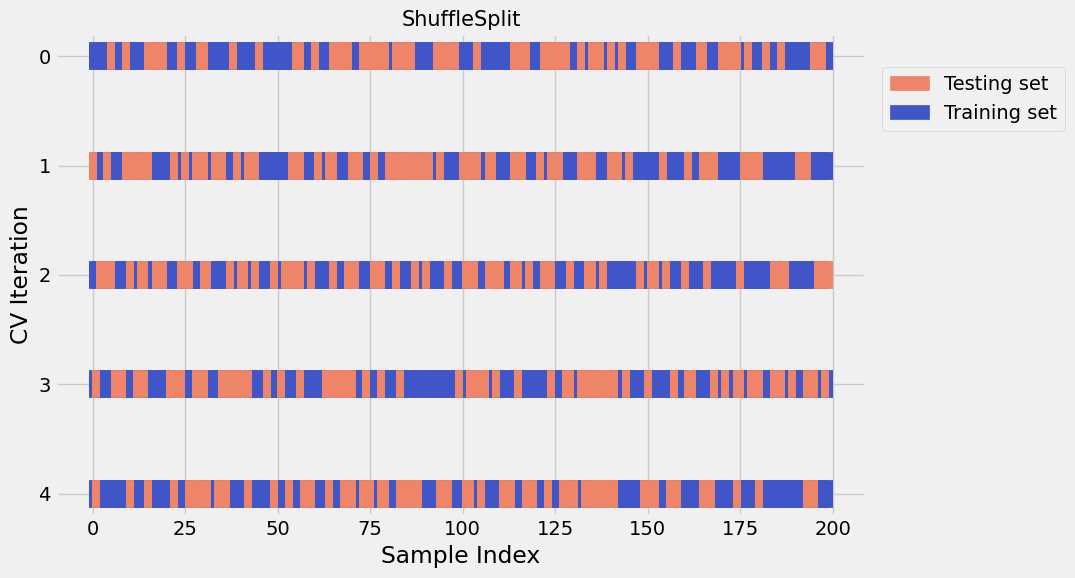

In [ ]:
visualize_cv_method(ss)

## **2.4.    StratifiedShuffleSplit**

Stratified ShuffleSplit merges the benefits of Stratified Splitting and ShuffleSplit by providing a randomized, repeated split that maintains the class distribution across each subset. Like ShuffleSplit, Stratified ShuffleSplit generates a specified number of random train-test splits; however, it goes further by ensuring each split retains the same proportion of each class as the original dataset. This makes it a flexible yet balanced approach for handling imbalanced classification tasks.

With Stratified ShuffleSplit, you get the randomness and flexibility of ShuffleSplit while ensuring that each sample retains the underlying class proportions, which is essential for consistent model evaluation in imbalanced datasets.

* **Advantages**
  * **Balanced, Random Splits with Class Consistency:** Stratified ShuffleSplit guarantees that each train-test split has a similar class distribution to the original data, helping prevent class imbalances within each fold. This is particularly beneficial for classification tasks where maintaining class proportions is critical for fair model evaluation.
  * **High Flexibility and Control:** Users can define the number of splits and the train-test ratio, giving Stratified ShuffleSplit flexibility in situations where you need repeated randomized sampling. This is ideal for iterative model validation or hyperparameter tuning, where repeated balanced samples improve model reliability without overfitting to a fixed split structure.

* **Disadvantages**
  - **Higher Computational Cost than Simple Stratified Splitting:** Stratified ShuffleSplit, like standard ShuffleSplit, requires generating multiple splits, which can add to the computational cost, especially with large datasets.
  - **Not Suitable for Non-Classification Tasks:** Similar to other stratified methods, this approach is most effective for classification problems where class balance is essential. For continuous targets, alternative splitting techniques are usually more appropriate.

* **Best Use Cases**
  - **Handling Imbalanced Data in Classification:** It’s ideal for datasets where certain classes are underrepresented, ensuring each split has a balanced view of all classes and improves model robustness against bias.
  - **Repeated Random Sampling is Required:** When you need a randomized but consistent approach for model evaluation—such as in iterative validation or repeated model training scenarios—Stratified ShuffleSplit provides balanced, varied splits that enhance evaluation stability.

In summary, Stratified ShuffleSplit is a powerful tool for generating randomized, balanced train-test splits that preserve class distributions. It’s particularly effective for imbalanced classification tasks where model reliability across all classes is crucial. The technique provides the benefits of both randomness and consistency, making it ideal for iterative validation processes while safeguarding against skewed class representation across splits.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def print_class_distribution(y_data, label="Data"):
    unique, counts = np.unique(y_data, return_counts=True)
    percentages = (counts / len(y_data)) * 100
    print(f"{label} Class Distribution:")
    for cls, count, percent in zip(unique, counts, percentages):
        print(f"Class {cls}: {count} ({percent:.2f}%)")
    print("")

n_samples = 200
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)  #

n_splits = 5
test_size = 0.2

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
print_class_distribution(y, "Original")

for split_idx, (train_index, test_index) in enumerate(sss.split(X, y), 1):
    y_train, y_test = y[train_index], y[test_index]

    print(f"Split {split_idx}")
    print_class_distribution(y_train, "Training Set")
    print_class_distribution(y_test, "Test Set")
    print("*" * 40)

Original Class Distribution:
Class 0: 109 (54.50%)
Class 1: 91 (45.50%)

Split 1
Training Set Class Distribution:
Class 0: 87 (54.37%)
Class 1: 73 (45.62%)

Test Set Class Distribution:
Class 0: 22 (55.00%)
Class 1: 18 (45.00%)

****************************************
Split 2
Training Set Class Distribution:
Class 0: 87 (54.37%)
Class 1: 73 (45.62%)

Test Set Class Distribution:
Class 0: 22 (55.00%)
Class 1: 18 (45.00%)

****************************************
Split 3
Training Set Class Distribution:
Class 0: 87 (54.37%)
Class 1: 73 (45.62%)

Test Set Class Distribution:
Class 0: 22 (55.00%)
Class 1: 18 (45.00%)

****************************************
Split 4
Training Set Class Distribution:
Class 0: 87 (54.37%)
Class 1: 73 (45.62%)

Test Set Class Distribution:
Class 0: 22 (55.00%)
Class 1: 18 (45.00%)

****************************************
Split 5
Training Set Class Distribution:
Class 0: 87 (54.37%)
Class 1: 73 (45.62%)

Test Set Class Distribution:
Class 0: 22 (55.00%)
Class

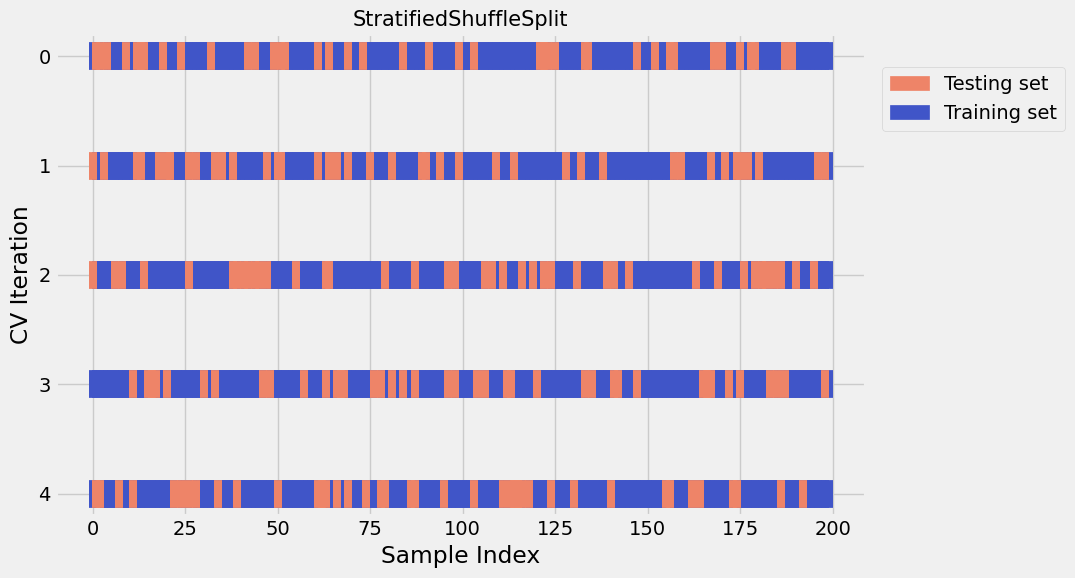

In [ ]:
visualize_cv_method(sss)

## **2.5.  K-Fold Cross-Validation**

K-Fold Cross-Validation is a robust data splitting technique that provides a more thorough approach to evaluating model performance. In K-fold cross-validation, the dataset is divided into K equal-sized subsets, or "folds." The model is then trained and evaluated K times, with each fold serving as the test set once, while the remaining K-1 folds are used for training. This process yields K sets of performance metrics, which can then be averaged to provide a more stable and reliable estimate of the model’s generalization ability.

* **Advantages**
  - **Reduced Bias and Variance:** By cycling through different subsets of data, K-fold cross-validation reduces the variance in performance metrics, providing a more stable estimate of model performance compared to a single train-test split. It also mitigates bias since every data point has the opportunity to be in the test set once, giving a comprehensive view of how well the model generalizes across different samples.
  - **More Data for Training:** Each training phase uses (K-1)/K of the data, which is nearly the entire dataset for training, helping to improve model learning and resulting in more accurate and generalizable models.

* **Disadvantages**
  - **Computational Cost:** K-Fold Cross-Validation requires the model to be trained K times, which can be computationally intensive, especially for large datasets or complex models. This makes it less feasible for large-scale projects or resource-constrained environments.
  - **Complexity with Certain Models:** For models that require long training times or that are sensitive to initial conditions (e.g., neural networks), running multiple training cycles can be challenging. Additionally, if the model includes data preprocessing steps, these steps need to be carefully repeated for each fold to avoid data leakage.

* **Choosing the Value of K**
  - The choice of K (typically between 5 and 10) affects both computational efficiency and performance stability:
    - **Higher K (e.g., K=10):** A larger K results in lower bias but increases computational cost. It also provides a more comprehensive assessment of performance.
    - **Lower K (e.g., K=5):** Reduces computational cost, which can be advantageous for larger datasets. It may, however, result in slightly higher variance in performance metrics.

* **Best Use Cases**
  - **Dataset Size is Moderate:** This technique is ideal for datasets that are not too large, where using most of the data for training can improve model accuracy without overwhelming computational resources.
  - **Reliable Performance Metrics Are Essential:** K-fold is beneficial when a stable and accurate estimate of model performance is necessary, especially in applications where model evaluation must be precise and reproducible.

In summary, K-Fold Cross-Validation is a powerful method for achieving reliable performance estimates. It provides a balance between bias and variance, yielding a solid assessment of how well a model may generalize to new data. While computationally demanding, it is particularly advantageous for datasets of moderate size and when accurate model evaluation is critical.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

n_samples = 20
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold}")
    print(f"Train indices: {', '.join(map(str, train_index))}")
    print(f"Test indices: {', '.join(map(str, test_index))}\n")

Fold 1
Train indices: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19
Test indices: 0, 1, 15, 17

Fold 2
Train indices: 0, 1, 2, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19
Test indices: 3, 5, 8, 11

Fold 3
Train indices: 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 19
Test indices: 2, 13, 16, 18

Fold 4
Train indices: 0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18
Test indices: 4, 9, 12, 19

Fold 5
Train indices: 0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19
Test indices: 6, 7, 10, 14



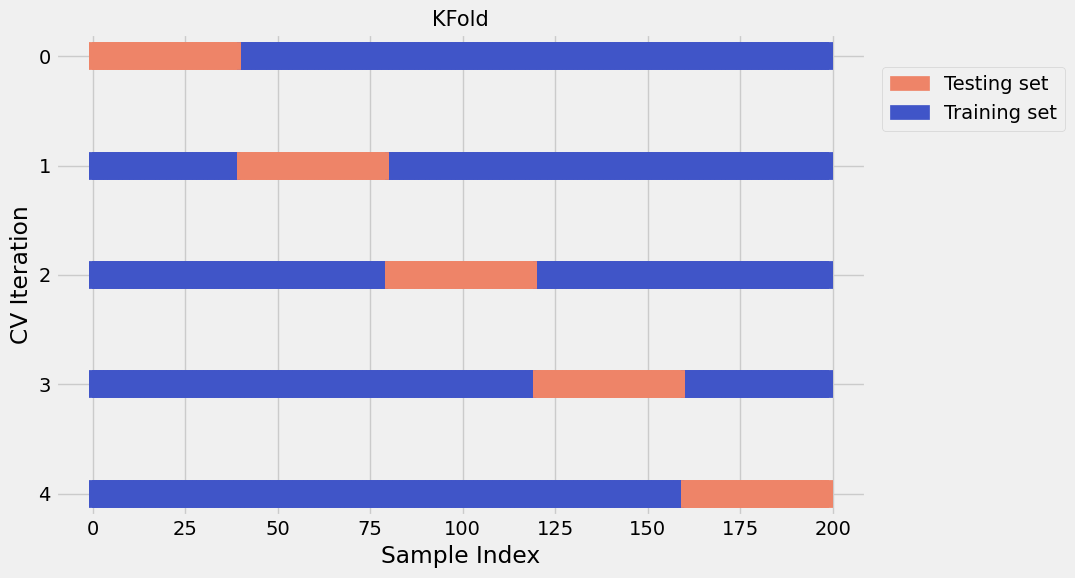

In [ ]:
visualize_cv_method(KFold(n_splits=n_splits))

## **2.6.    StratifiedKFold**

Stratified K-Fold Cross-Validation is an enhancement of the standard K-Fold cross-validation technique that maintains the class distribution across all folds. This is particularly useful in classification tasks, especially those with imbalanced classes. While K-Fold divides the data into K non-overlapping subsets, Stratified K-Fold goes a step further by ensuring that each fold preserves the proportion of each class as seen in the original dataset.

By using stratification in K-Fold cross-validation, we achieve more representative and balanced folds, leading to more reliable performance metrics, particularly in cases where certain classes might otherwise be underrepresented in individual folds.

* **Advantages**
  - **Consistent Class Representation Across Folds:** Stratified K-Fold ensures that each fold reflects the original class distribution, which is critical for imbalanced datasets. This provides a better estimate of model performance, as each fold contains a representative sample of all classes.
  - **Reduced Variability in Performance Metrics:** Since each fold has similar class proportions, stratified splitting reduces performance variance across folds, producing more stable and consistent evaluation metrics that help gauge how the model will perform on new, unseen data.

* **Disadvantages**
  - **Less Flexible for Non-Classification Tasks:** Stratified K-Fold is primarily valuable for classification problems, as it depends on discrete target classes. For regression tasks, where the target is continuous, standard K-Fold or other techniques might be more appropriate.
  - **Increased Complexity in Multi-Class Problems:** For datasets with a large number of classes, stratified splitting can become complex, especially if certain classes have very few instances. This can make achieving balanced folds more challenging, potentially limiting the number of folds available.

* **Best Use Cases**
  - **Imbalanced Classification Tasks:** When dealing with datasets where some classes are significantly less represented, Stratified K-Fold ensures a balanced view across all folds.
  - **Reliable Performance Estimation in Classification:** For classification tasks where stable, consistent metrics are essential, this technique offers a robust method for evaluating model generalization by ensuring each fold’s class distribution mirrors the full dataset.

In summary, Stratified K-Fold Cross-Validation combines the robust evaluation benefits of K-Fold with additional safeguards for maintaining class balance, making it a powerful tool for classification tasks, especially those involving imbalanced datasets. It helps avoid misleading performance metrics that might arise from underrepresented classes in individual folds, thereby providing a more realistic and reliable assessment of model performance across all classes.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def print_class_distribution(y_data, label="Data"):
    unique, counts = np.unique(y_data, return_counts=True)
    percentages = (counts / len(y_data)) * 100
    print(f"{label} Class Distribution:")
    for cls, count, percent in zip(unique, counts, percentages):
        print(f"Class {cls}: {count} ({percent:.2f}%)")
    print("")

X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print_class_distribution(y, "Original")

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold}")
    print_class_distribution(y_train, "Training Set")
    print_class_distribution(y_test, "Test Set")
    print("*" * 40)

Original Class Distribution:
Class 0: 95 (47.50%)
Class 1: 105 (52.50%)

Fold 1
Training Set Class Distribution:
Class 0: 76 (47.50%)
Class 1: 84 (52.50%)

Test Set Class Distribution:
Class 0: 19 (47.50%)
Class 1: 21 (52.50%)

****************************************
Fold 2
Training Set Class Distribution:
Class 0: 76 (47.50%)
Class 1: 84 (52.50%)

Test Set Class Distribution:
Class 0: 19 (47.50%)
Class 1: 21 (52.50%)

****************************************
Fold 3
Training Set Class Distribution:
Class 0: 76 (47.50%)
Class 1: 84 (52.50%)

Test Set Class Distribution:
Class 0: 19 (47.50%)
Class 1: 21 (52.50%)

****************************************
Fold 4
Training Set Class Distribution:
Class 0: 76 (47.50%)
Class 1: 84 (52.50%)

Test Set Class Distribution:
Class 0: 19 (47.50%)
Class 1: 21 (52.50%)

****************************************
Fold 5
Training Set Class Distribution:
Class 0: 76 (47.50%)
Class 1: 84 (52.50%)

Test Set Class Distribution:
Class 0: 19 (47.50%)
Class 1: 2

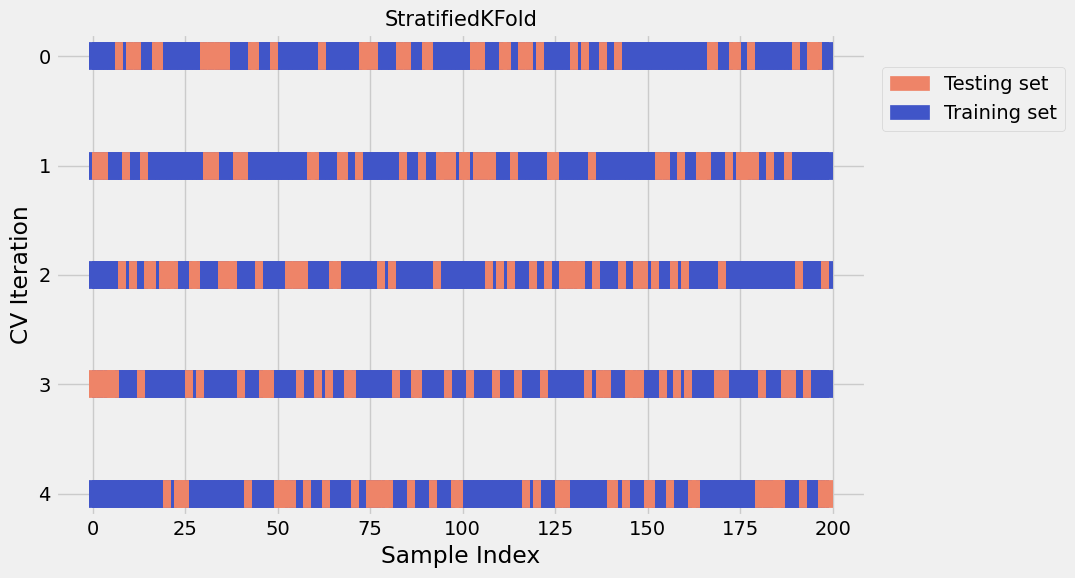

In [ ]:
visualize_cv_method(skf)

## **2.7.    TimeSeriesSplit**

TimeSeriesSplit is specifically designed for time series data, where the sequence and order of data points are critical to maintain. Unlike standard cross-validation techniques, TimeSeriesSplit respects the chronological order of observations, ensuring that future data points are not used to predict past ones. In this approach, the data is split sequentially into increasingly larger training sets and a test set that always follows each training set, reflecting the natural flow of time.

Each split in TimeSeriesSplit leaves earlier data out of the test set to simulate real-world scenarios, where future data is not available at training time. This makes it particularly valuable for time-dependent problems, such as stock price prediction, weather forecasting, or any scenario where temporal dependencies are key.

* **Advantages**
  - **Preserves Temporal Order:** TimeSeriesSplit maintains the integrity of time-dependent data, ensuring that the model only trains on past data and evaluates on future data. This provides a realistic assessment of how well the model may perform on unseen, future observations.
  - **Flexible and Expanding Training Sets:** Each successive split uses a larger portion of the data for training, which can help improve model performance as more historical information is used. This structure often mimics real-world scenarios where more data accumulates over time, allowing models to become progressively more accurate.

* **Disadvantages**
  - **Limited Test Set Size:** Since TimeSeriesSplit moves forward through the dataset, the test set size may be smaller in earlier splits, which can make evaluation less reliable, particularly when dealing with short time series.
  - **Increased Computational Cost for Large Datasets:** For long time series, the growing training sets can significantly increase computational load as the model trains on progressively larger subsets. This can be an issue with large-scale or high-frequency data.

* **Best Use Cases**
  - **Working with Sequential or Temporal Data:** For forecasting or predictive tasks where data order matters, such as financial time series, sensor data, or event-based predictions, TimeSeriesSplit ensures model evaluation respects the natural sequence of time.
  - **Evaluating Time-Dependent Model Stability:** TimeSeriesSplit provides a way to test model stability across different time periods, enabling you to see if the model's performance changes over different time windows and adapts well to evolving trends.

In summary, TimeSeriesSplit is a crucial tool for time series and sequential data, as it respects the chronological order of observations, providing a realistic and reliable way to evaluate models on temporal data. By using progressively larger training sets, it reflects how models would perform as more data becomes available over time. This makes TimeSeriesSplit the go-to choice for predictive modeling in time-dependent applications, ensuring robust and temporally relevant model evaluation.

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

n_samples = 20
data = np.arange(n_samples)

n_splits = 5

tss = TimeSeriesSplit(n_splits=n_splits)

for i, (train_index, test_index) in enumerate(tss.split(data)):
    print(f'TimeSeriesSplit {i+1}:')
    print(f'Training indices: {", ".join(map(str, train_index))}')
    print(f'Testing indices: {", ".join(map(str, test_index))}\n')

TimeSeriesSplit 1:
Training indices: 0, 1, 2, 3, 4
Testing indices: 5, 6, 7

TimeSeriesSplit 2:
Training indices: 0, 1, 2, 3, 4, 5, 6, 7
Testing indices: 8, 9, 10

TimeSeriesSplit 3:
Training indices: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
Testing indices: 11, 12, 13

TimeSeriesSplit 4:
Training indices: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
Testing indices: 14, 15, 16

TimeSeriesSplit 5:
Training indices: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16
Testing indices: 17, 18, 19



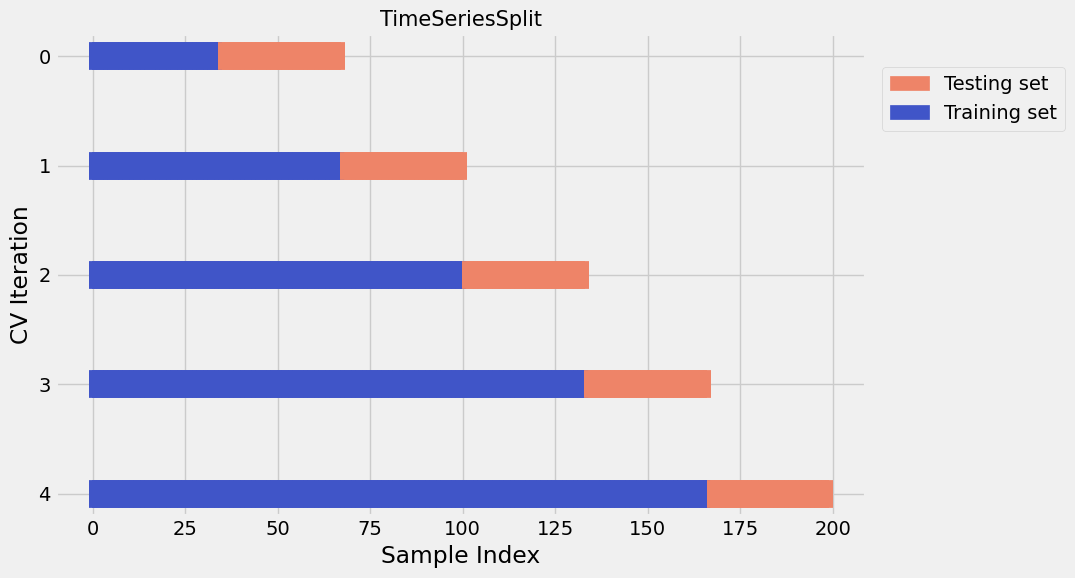

In [ ]:
visualize_cv_method(tss)

## **2.8.    Leave-One-Out Cross-Validation (LOOCV)**

Leave-One-Out Cross-Validation (LOOCV) is an exhaustive and highly granular cross-validation technique where each data point in the dataset serves as a single test set, with the remaining data used for training. This means that if there are n observations, LOOCV will create n separate train-test splits, each using one unique data point as the test set. This technique is particularly valuable for small datasets, where every individual data point's contribution to model performance is meaningful and worth examining.

LOOCV offers a comprehensive evaluation of model performance by testing each observation independently, providing insights into how the model might generalize to individual points rather than an aggregated performance across larger test sets.

* **Advantages**
  - **Unbiased Performance Evaluation:** Since each observation is tested individually, LOOCV provides a detailed and unbiased estimate of model performance. This is especially useful when you want to measure the sensitivity of the model to specific data points.
  - **Ideal for Small Datasets:** For limited datasets, LOOCV maximizes the use of each data point for training, offering an accurate view of how the model performs with minimal training data wastage.

* **Disadvantages**
  - **High Computational Cost:** LOOCV can be computationally expensive, particularly for large datasets, as it requires training and evaluating the model n times. For large-scale data or models with complex architectures, this can become infeasible.
  - **Variance in Performance Estimates:** LOOCV can result in high variance in performance metrics because each test set is only a single observation. Small variations or outliers in the data can significantly impact the outcome of each split, which may lead to unstable and overly sensitive evaluations.

* **Best Use Cases**
  - **Data is Limited:** When there are few observations and you need to maximize the utility of each data point, LOOCV provides a precise, granular evaluation of model performance.
  - **You Need the Most Accurate Error Estimate for New Data:** LOOCV is a strong choice when the goal is to understand how well the model generalizes to new data on an individual point level, which is critical for applications requiring high accuracy in predictions.

* **Caution**
  - **High Resource Demands on Large Datasets:** If you have a large dataset, LOOCV’s high computational cost can become a bottleneck, making it impractical for resource-intensive tasks.
  - **Many Parameters or Complex Models:** For models with numerous hyperparameters or complex architectures, the computational load from LOOCV can increase significantly, making other methods like K-Fold Cross-Validation a more efficient alternative.

In summary, Leave-One-Out Cross-Validation is a powerful technique for evaluating model performance, particularly suited to small datasets and scenarios where precision on an individual data point level is paramount. While it can be computationally demanding, LOOCV remains a valuable method for gaining in-depth insights into model robustness and the influence of each data point, making it especially useful for understanding potential outliers or highly influential observations.

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

n_samples = 20
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f'LeaveOneOut Split {i+1}:')
    print(f'Training indices: {", ".join(map(str, train_index))}')
    print(f'Testing index: {", ".join(map(str, test_index))}\n')

    if i >= 4:
        print("...more splits...")
        break

LeaveOneOut Split 1:
Training indices: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing index: 0

LeaveOneOut Split 2:
Training indices: 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing index: 1

LeaveOneOut Split 3:
Training indices: 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing index: 2

LeaveOneOut Split 4:
Training indices: 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing index: 3

LeaveOneOut Split 5:
Training indices: 0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing index: 4

...more splits...


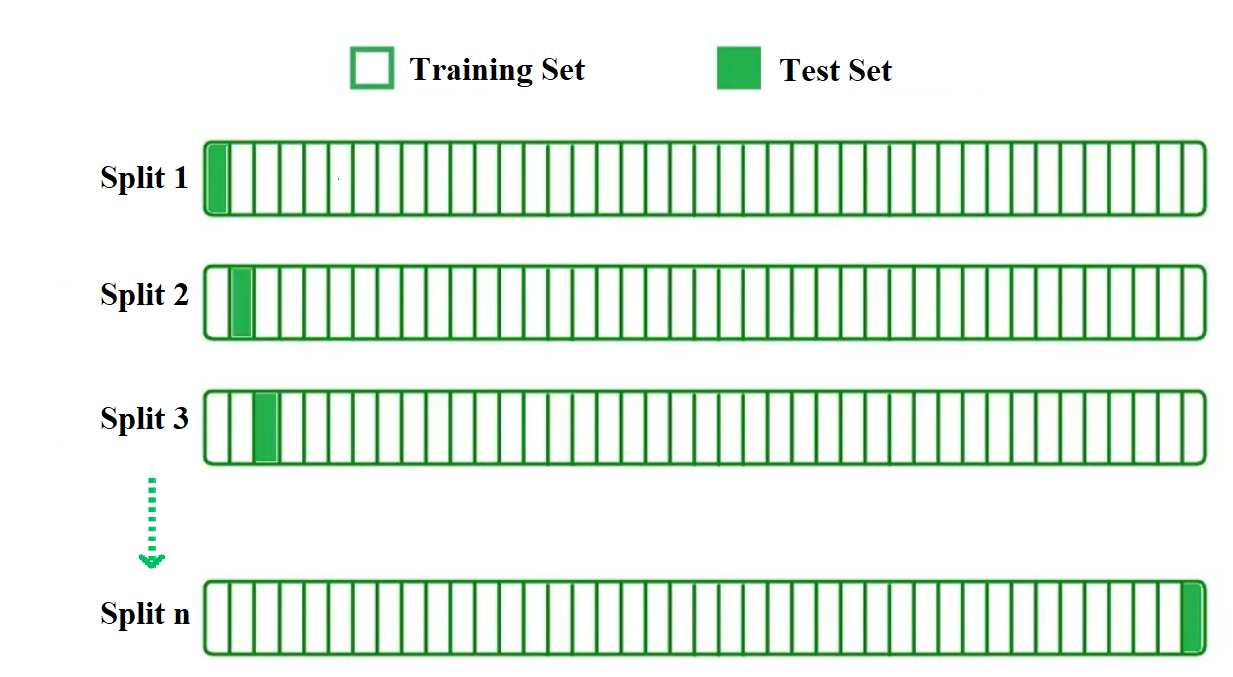

## **2.9.    Leave-P-Out Cross-Validation (LPOCV)**

Leave-P-Out Cross-Validation (LPOCV) is a generalization of Leave-One-Out Cross-Validation (LOOCV), where p data points are left out during each iteration, instead of just one. This technique involves systematically leaving out p data points for testing and training the model on the remaining n−p data points. Like LOOCV, LPOCV repeats this process until each subset of p observations has been used as a test set exactly once. This provides a robust way to evaluate the model, particularly for small datasets, while allowing for more than one observation to be omitted at a time.

The flexibility to choose p allows users to control how many data points are excluded from the training set in each fold, offering a wider range of model evaluation granularity compared to LOOCV.

* **Advantages**
  - **Comprehensive Performance Evaluation:** LPOCV provides a more generalized performance measure compared to LOOCV, as it tests the model's ability to generalize across multiple points in each split. This can help in identifying how well the model handles small changes in the dataset.
  - **Reduces Variance:** By leaving out multiple data points per split, LPOCV can reduce the high variance often seen in LOOCV, where a single outlier or point can disproportionately influence the evaluation. This makes it a more stable method of validation when compared to LOOCV.
  - **Ideal for Small to Medium-Sized Datasets:** Like LOOCV, LPOCV is suited for smaller datasets where every data point is critical for evaluation. However, by allowing for more points to be omitted, it can strike a balance between the exhaustive nature of LOOCV and the need for stable, less sensitive evaluation.

* **Disadvantages**
  - **High Computational Cost:** While LPOCV is less computationally intensive than LOOCV (since fewer points are left out), it still requires training the model multiple times, making it computationally expensive for larger datasets or complex models with many features or hyperparameters.
  - **Less Granular than LOOCV:** Since more than one data point is omitted at a time, LPOCV is less granular than LOOCV in terms of evaluating the model's performance on individual data points. It may not provide the same level of detail on how specific points influence the model’s predictions.
  - **Choosing the Right Value of p:** Selecting the appropriate value for p can be tricky, as choosing too large a value for p may lead to high bias, while a very small p may not fully reduce the variance.

* **Best Use Cases**
  - **You Want a Balance Between LOOCV and K-Fold:** LPOCV is an effective choice when you need more than one observation in the test set, but still want to maintain a systematic and comprehensive evaluation across multiple test sets.
  - **Dealing with Small to Medium Datasets:** If your dataset is small to medium-sized, LPOCV provides a useful method for assessing model performance with less computational cost than LOOCV, while still offering better variance reduction.
  - **Reducing Sensitivity to Outliers:** By leaving out multiple data points at once, LPOCV provides a more stable evaluation, reducing the impact of outliers or singular data points that might otherwise skew results in LOOCV.

* **Caution**
  - **Computational Overhead for Large Datasets:** Like LOOCV, LPOCV can become computationally expensive as the size of the dataset or the value of p increases. For large datasets, it may be better to use methods like K-Fold Cross-Validation, which provides a good trade-off between computational cost and evaluation reliability.
  - **Not Ideal for Very Large p:** If p becomes too large relative to the dataset size, the number of iterations (and thus training times) grows rapidly, and the advantage of cross-validation diminishes.

In summary, Leave-P-Out Cross-Validation offers a balanced approach between LOOCV and K-Fold Cross-Validation by allowing for multiple points to be excluded from the training set per iteration. While it provides a more stable estimate of model performance compared to LOOCV, it still carries a computational cost and may require careful tuning of the p parameter. LPOCV is especially useful for small to medium-sized datasets where a fine-grained evaluation is necessary, but with reduced sensitivity to individual data points compared to LOOCV.

In [ ]:
import numpy as np
from sklearn.model_selection import LeavePOut

n_samples = 20
X = np.arange(n_samples).reshape(-1, 1)
y = np.random.choice([0, 1], size=n_samples)

p = 2
lpo = LeavePOut(p=p)

for i, (train_index, test_index) in enumerate(lpo.split(X)):
    print(f'LeavePOut Split {i+1} (p={p}):')
    print(f'Training indices: {", ".join(map(str, train_index))}')
    print(f'Testing indices: {", ".join(map(str, test_index))}\n')

    if i >= 4:
        print("...more splits...")
        break

LeavePOut Split 1 (p=2):
Training indices: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing indices: 0, 1

LeavePOut Split 2 (p=2):
Training indices: 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing indices: 0, 2

LeavePOut Split 3 (p=2):
Training indices: 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing indices: 0, 3

LeavePOut Split 4 (p=2):
Training indices: 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing indices: 0, 4

LeavePOut Split 5 (p=2):
Training indices: 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Testing indices: 0, 5

...more splits...


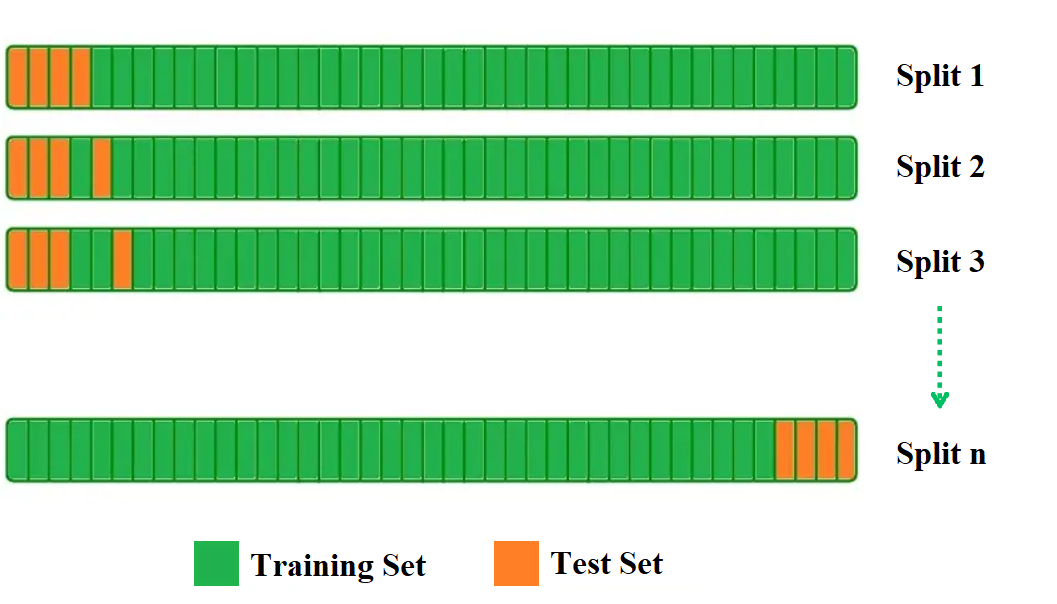

# **Section 3. Model Performance Evaluation**

The code evaluates the performance of various cross-validation techniques (e.g., holdout, k-fold, and stratified splitting) on a Logistic Regression model using the Iris dataset. It measures the accuracy and computation time for each method, helping to compare their effectiveness and efficiency in model evaluation. The results include the average accuracy and time taken for each technique, providing insights into the trade-offs between model performance and computational cost.

In [ ]:
import time
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit, LeaveOneOut, LeavePOut, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()

# Initialize models and cross-validation methods
models = {
    "Train/Test Split (Holdout)": "holdout",
    "Stratified Holdout Split": "stratified_holdout",
    "KFold": KFold(n_splits=5),
    "StratifiedKFold": StratifiedKFold(n_splits=5),
    "StratifiedShuffleSplit": StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    "ShuffleSplit": ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    "LeaveOneOut": LeaveOneOut(),
    "LeavePOut": LeavePOut(p=2)
}

# Store results
results = {}

# Train and evaluate models for each cross-validation method
for method_name, cv_method in models.items():
    # Start timer
    start_time = time.time()

    # Store scores for this method
    scores = []

    # Train/Test Split (Holdout)
    if method_name == "Train/Test Split (Holdout)":
        # Holdout split (train/test)
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
        clf = LogisticRegression().fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    # Stratified Holdout Split
    elif method_name == "Stratified Holdout Split":
        # Stratified holdout split
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target, random_state=42)
        clf = LogisticRegression().fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    # For other cross-validation methods
    else:
          for train_index, test_index in cv_method.split(iris.data, iris.target):
              X_train, X_test = iris.data[train_index], iris.data[test_index]
              y_train, y_test = iris.target[train_index], iris.target[test_index]
              clf = LogisticRegression().fit(X_train, y_train)
              y_pred = clf.predict(X_test)
              scores.append(accuracy_score(y_test, y_pred))

    # Calculate total time taken
    total_time = time.time() - start_time

    # Store results for this method
    results[method_name] = {
        "scores": scores,
        "average_accuracy": np.mean(scores),
        "time_taken": total_time
    }

# Print results
print(f"{'Method':<28} {'Average Accuracy':<21} {'Time Taken (seconds)'}")
print("="*70)

for method_name, result in results.items():
    print(f"{method_name:<28} {result['average_accuracy']:<21.4f} {result['time_taken']:.4f}")

Method                       Average Accuracy      Time Taken (seconds)
Train/Test Split (Holdout)   1.0000                0.0650
Stratified Holdout Split     0.9667                0.0432
KFold                        0.9267                0.1605
StratifiedKFold              0.9733                0.1537
StratifiedShuffleSplit       0.9600                0.1635
ShuffleSplit                 0.9600                0.1554
LeaveOneOut                  0.9667                6.7395
LeavePOut                    0.9653                241.8688



The output results show the following insights for each cross-validation technique when applied to the Iris dataset:

* **Train/Test Split (Holdout):** Achieved perfect accuracy (1.0) with a relatively low time of 0.065 seconds. However, this method may overestimate accuracy as it relies on a single split, which can lead to performance variance.

* **Stratified Holdout Split:** Provided high accuracy (96.67%) with a faster runtime (0.043 seconds). This method preserves class distribution in both splits, making it more reliable than a simple holdout, especially for imbalanced datasets.

* **KFold:** Achieved a slightly lower average accuracy (92.67%) compared to other methods, with a moderate time of 0.16 seconds. KFold generally provides a good balance by using multiple splits, though it may not perfectly handle class imbalances.

* **StratifiedKFold:** Gave high accuracy (97.33%) and maintained a low runtime (0.1537 seconds). This method is particularly useful for the Iris dataset as it keeps class distributions consistent across folds.

* **StratifiedShuffleSplit and ShuffleSplit:** Both methods delivered similar accuracy (96%) and runtimes (around 0.16 seconds), offering a flexible approach to random splitting that can help detect overfitting or class imbalance issues.

* **LeaveOneOut:** Provided an accuracy of 96.67%, but took significantly more time (6.7395 seconds) due to training on nearly the entire dataset repeatedly. This method is computationally intensive and may not be practical for larger datasets.

* **LeavePOut:** Delivered a similar accuracy (96.53%) but had the highest computation time (241.8688 seconds). While very thorough, this technique becomes infeasible with larger datasets due to the extreme number of splits.

In summary, StratifiedKFold provides an ideal balance of high accuracy and moderate runtime, making it a preferred choice for evaluating models on balanced datasets like Iris. Techniques like LeaveOneOut and LeavePOut are accurate but impractical for typical use due to their high computational cost.

The results demonstrate how different data-splitting methods impact both accuracy and computational efficiency. Simpler techniques like the basic train/test split and stratified holdout provide quick results with good accuracy, though they may risk overfitting, as they only rely on a single split. These methods are highly efficient but lack the robustness of more thorough cross-validation approaches.

Methods like KFold and StratifiedKFold provide a better estimation of model performance by averaging over multiple splits. This ensures that each subset of data contributes to training and testing, enhancing the model's generalizability, particularly in balanced datasets like Iris. These techniques show a slight drop in accuracy compared to holdout but offer a more reliable measure of model performance.

LeaveOneOut and LeavePOut, which are exhaustive methods, yield accuracy close to other methods but are computationally intensive, especially LeavePOut. These are best suited for small datasets or when each data point’s impact needs close examination, though the high runtime makes them impractical for larger datasets. Overall, stratified methods and KFold balances accuracy and computational time well, especially for general model evaluation.

# **Conclusion**

| Cross-Validation Technique |	Advantages |	Limitations |	Best Use Case |
|:----:|:----:|:----:|:----:|
|Holdout (train-test split)|	Simple, easy to implement. Good for small datasets.	| Can suffer from high variance due to random splits. |	Quick testing, smaller datasets. |
|Stratified KFold|	Ensures each fold has a balanced class distribution.|	Computationally expensive for large datasets.|	Classification tasks with imbalanced classes.|
|KFold Cross-Validation|	Works well for balanced datasets.|	Doesn't handle imbalanced data well.|	General-purpose, balanced datasets.|
|ShuffleSplit|	Flexible, allows for random shuffling, can be repeated.|	Doesn’t always respect class distribution (unless stratified).|	Scenarios requiring multiple random splits.|
|StratifiedShuffleSplit|	Ensures class distribution is maintained across splits.|	Might be overkill for balanced datasets.	|Imbalanced classification tasks, data with small classes.|
|TimeSeriesSplit|	Handles sequential data, avoids data leakage.	|Can't be used for non-sequential data.|	Time series forecasting or sequential data.|
|LeaveOneOut|	Works well with small datasets, uses every sample as test.|	Computationally expensive for large datasets.	|Small datasets, precision in testing each individual instance.|
|LeavePOut|	Provides an even finer evaluation by leaving out more points.|	Very expensive computationally for large datasets.	|Situations where very fine-grained validation is needed, |typically for small datasets.

In this project, we explored and visualized different cross-validation techniques to better understand how they handle data splits, providing clearer insights into their functionality and application. By printing the indices and class distributions for each method, we were able to see how the data is divided and how it affects model training and testing.

The main takeaway from this analysis is that the choice of cross-validation technique depends on the specific dataset and problem at hand. For example, Stratified methods are crucial for imbalanced datasets, while TimeSeriesSplit is indispensable when working with sequential data. K-Fold and ShuffleSplit offer flexibility for general use, and techniques like LeaveOneOut and LeavePOut are valuable for exhaustive evaluation, though computationally intensive.

Each of these techniques has its own strengths and weaknesses, and the choice of method largely depends on the dataset size, nature, and problem at hand. The visualizations provided in this article help clarify how these methods work, and the printed indices and distributions enhance the understanding of how data is split for model validation. Ultimately, understanding and selecting the appropriate cross-validation method is key to building reliable and generalizable machine learning models.